In [2]:
#训练误差：模型在训练数据上的误差
#泛化误差：模型在新数据集上的误差
#验证数据集：一个用来评估模型好坏的数据集，不要和训练数据混在一起
#测试数据集：只用一次的数据集

In [3]:
#k-则交叉验证
#在没有足够多数据时使用（常态）
#算法
#1.将训练数据分割成k块
#2.For i,....,K
   #使用第i块作为数据集，其余作为训练集进行训练
#3.报告K个验证集误差的平均
#常用：K=5或10

# 过拟合和欠拟合
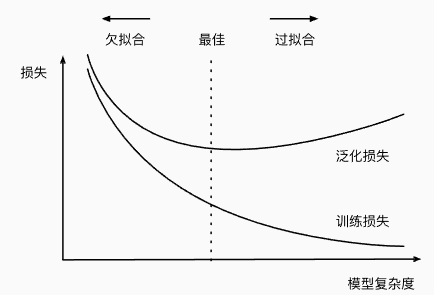

# 估计模型容量
 #### 不同种类算法之间难以比较
 #### 对于一种给定的模型种类：参数的个数和参数值的选择范围影响模型容量

# VC维
1. 统计学习理论的一个核心思想
2. 对于一个分类模型，VC等于一个最大的数据集的大小，不管如何给定标号，都存在一个模型来对它进行完美分类。（这边说的有点抽象，说白了就是：VC=模型一定能进行完美分类的最大数据集）

#### 例子：2维输入的感知机，VC维=3（因为它不能解决xor问题，所以不可以是4及往上） 支持N维输出的感知机的VC维是N+1 ；一些多层感知机的VC维O(Nlog2N)

### 用处：
1. 提供一个模型好的理论依据
2. 以衡量训练误差和泛化误差之间的间隔

# 数据复杂度
1. 样本个数
2. 每个样本的元素个数
3. 时间、空间结构
4. 多样性

In [16]:
import math
import torch
import numpy as np
from torch import nn

In [74]:
#生成数据集的函数：y=1.2x-3.4x^2+5.6x^3+5+e
n_train,n_test,true_w,true_b = 100,100,[1.2,-3.4,-5.6],5
features = torch.normal(0.7,0.1,(n_train+n_test,1))
pfeatures = features.clone()
features = torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1)
labels = (true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_w[2]*features[:,2]+true_b)
labels += torch.normal(0,0.01,(labels.shape))

In [75]:
features[:2],labels[:2]

(tensor([[0.6638, 0.4406, 0.2925],
         [0.5864, 0.3438, 0.2016]]),
 tensor([2.6426, 3.4029]))

In [76]:
import matplotlib.pyplot as plt
#作图函数
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None,y2_vals=None,legend=None, figsize=(3.5, 2.5)):
    plt.figure(figsize=figsize)
    plt.xlabel(x_label)  
    plt.ylabel(y_label)  
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend) #用于显示图例

In [98]:
def train(train_features,test_features,train_labels,test_labels):
    net = torch.nn.Linear(train_features.shape[-1],1)
    batch_size = min(10,train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features,train_labels)  #用于合成数据集
    train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_loss,test_loss = [],[]
    loss = torch.nn.MSELoss()
    for _ in range(100):
        for X,y in train_iter:
            l = loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_loss.append(loss(net(train_features),train_labels).item())
        test_loss.append(loss(net(test_features),test_labels).item())
    print("final epoch train_loss :",train_loss[-1],"test_loss:",test_loss[-1])
    semilogy(range(1, 100 + 1), train_loss, 'epochs', 'loss',
             range(1, 100 + 1), test_loss, ['train', 'test'])
    print('weight:', net.weight.data,'\nbias:', net.bias.data)

final epoch train_loss : 1.552390217781067 test_loss: 1.5896825790405273
weight: tensor([[ 0.4411,  0.6699, -0.3325]]) 
bias: tensor([1.6158])


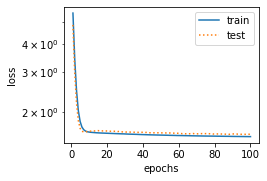

In [99]:
#首先用三阶多项式拟合函数（结果正常）
train(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch train_loss : 1.5495938062667847 test_loss: 1.5904133319854736
weight: tensor([[0.7522]]) 
bias: tensor([1.6226])


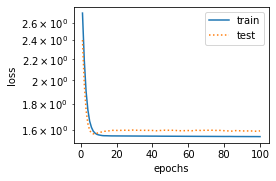

In [100]:
#线性函数拟合
train(pfeatures[:n_train, :], pfeatures[n_train:, :], labels[:n_train], labels[n_train:])

final epoch train_loss : 0.16290733218193054 test_loss: 2.989717721939087
weight: tensor([[1.3961, 0.3774, 0.5434]]) 
bias: tensor([1.7730])


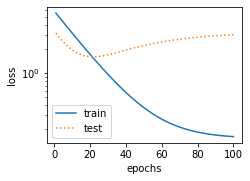

In [101]:
#训练样本不足(过拟合)
train(features[0:2, :], features[n_train:, :], labels[0:2], labels[n_train:])